# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.stats import t, norm
from numpy.random import seed

pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.924,1
1,18,1,33.770,1,0,2,1725.552,1
2,28,1,33.000,3,0,2,4449.462,0
3,33,1,22.705,0,0,1,21984.471,0
4,32,1,28.880,0,0,1,3866.855,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

<Axes: xlabel='charges', ylabel='Count'>

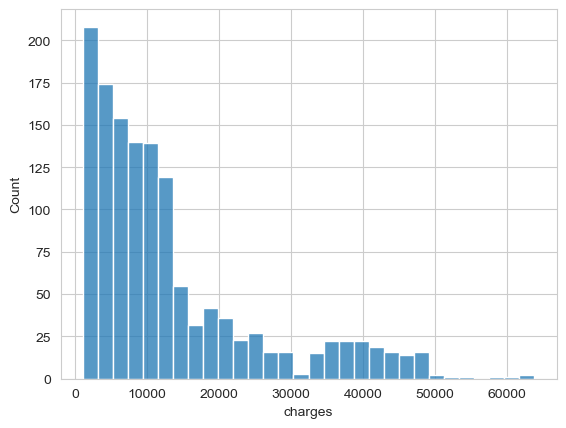

In [4]:
sns.histplot(medical.charges)

In [5]:
sample_mean = np.mean(medical.charges)
sample_std = np.std(medical.charges)
print("sample_mean", sample_mean)
print("std", sample_std)

sample_mean 13270.422265141257
std 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  <font color=teal>Assuming we don't have a enough data to prove he actual trend - and we have to resport to statistics, then we have enough data to tell what the average was for the time the data was taken.  We don't have time as a column, so all we can do is say whether the average from the sample supports or does not support the null hypothesis.  I would create a sample distribution of the statndard mean becuase the raw data distribution is not normal<font/>

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ <font color=teal>A one-tailed test for understanding the 12,000 average charge, but a two tailed for whther insurance plays a factor - one way or the other in charge amount.  Of course, we could do that with a simple query, so I might be missing something<font/>

In [6]:
confidence = .95
alpha = (1-confidence)
n = len(medical)

In [7]:
z_score_1_tail = norm.ppf(confidence)
z_score_1_tail

1.6448536269514722

In [8]:
# z_score_2_tail = norm.ppf(1-alpha/2)
# z_score_2_tail

1.959963984540054

In [9]:
standard_error = (sample_std / np.sqrt(n))
standard_error

330.943713906084

In [10]:
margin_of_error1 = z_score_1_tail * standard_error
# margin_of_error2 = z_score_2_tail * standard_error
# print(margin_of_error1, margin_of_error2)

544.3539681352127 648.6377601658521


In [170]:
def manual_t_test(x_bar, y_bar, s, n):
    return ((x_bar - y_bar) * np.sqrt(n))/ s

def s_pool_denomiator1(n0, n1, s0, s1):
    ns0_ = (n0-1) * s0**2
    ns1_ = (n1-1) * s1**2
    df_ = n0 + n1 - 2
    return np.sqrt( (ns0_ + ns1_) / df  )

def s_pool_denomiator2(n0, n1):
    return np.sqrt( 1/n0 + 1/n1 )


def plot_t(tval, pval):
    x = np.linspace(-4,4,1001)
    tdist = t.pdf(x,df) * np.mean(np.diff(x))

    plt.plot(x,tdist,linewidth=2)
    plt.axvline(tval, color='r', linestyle='--')
    plt.legend(('H_0 distribution','Observed t-value'))
    plt.xlabel('t-value')
    plt.ylabel('pdf(t)')
    plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
    plt.show()


def plot_one_t( data, H0val, alternative='two-sided' ):
    # show the H0 parameter distribution and observed t-value
    sample_mean = np.mean(data)
    sample_std = np.std(data)
    n = len(data)

    tval = manual_t_test(x_bar=sample_mean, y_bar=H0val, s=sample_std, n=n)
    df = n - 1

    pval = 1-t.cdf(abs(tval),df)
    if alternative == 'two-sided':
        pval /= 2
    plot_t(tval, pval)


def manual_pooled_t_test(set1, set2, mode=2):

    x_bar =  np.mean(set1)
    y_bar = np.mean(set2)

    n0 = len(set1)
    n1 = len(set2)

    s0 = np.std(set1)
    s1 = np.std(set2)

    difference_of_means = x_bar - y_bar
    sp1 = s_pool_denomiator1(n0, n1, s0, s1)
    demoninator = sp1
    if mode == 2:
        sp2 = s_pool_denomiator2(n0, n1)
        demoninator = sp1 * sp2

    tval = difference_of_means / demoninator
    pval = t.cdf(abs(tval), df=max(n1,n0)-1)
    return tval, pval



<font color=teal>Manual calculation<font/>

Based on this data I would reject the Null Hypothesis that charges have dropped to 12,000


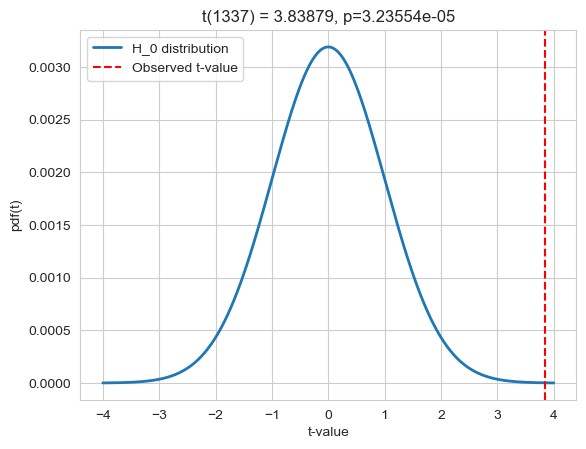

In [172]:

print("Based on this data I would reject the Null Hypothesis that charges have dropped to 12,000")
plot_one_t(data=medical.charges, H0val=12000, alternative='two-sided')


<font color=teal>Using SciPy calculation<font/>

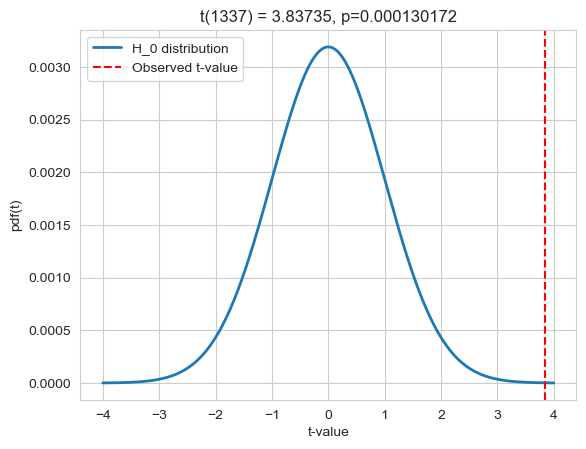

In [173]:
from scipy.stats import ttest_1samp

t_value, p_value = ttest_1samp(medical.charges, 12000, alternative='two-sided')
df = n-1

plot_t(t_value, p_value)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Assumptions:
- That size of each group is roughly similar
- That the variances are not similar
- That the insured and uninsured sets are not paired


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

This is an UnPaired test - different customer are insured vs uninsured  
variances are pretty different bewteen insured and uninsurance groups 197036140.77172482, uninsured charges 41482614.44965368
The populations of insured vs uninsured are somewhat different:  41% vs 59% : 0.5852017937219731
MANUAL: t-value is 11.90576019233371, and p-value is 1.0
SCIPY: t-value is 11.893299030876712, and p-value is 4.461230231620717e-31


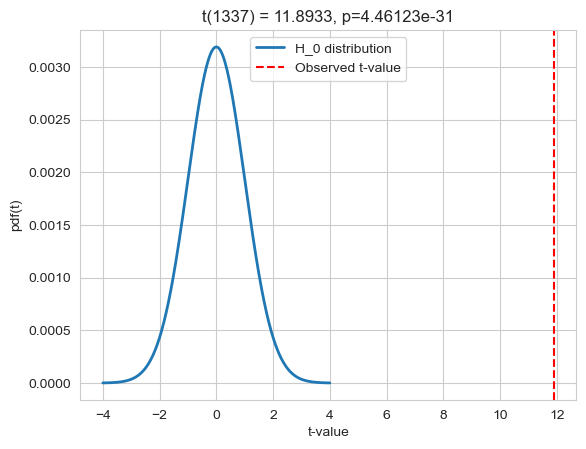

I would reject the Null Hypothesis that there is no difference between charges for uninsured vs insured


In [175]:
from scipy.stats import ttest_ind


set1 = medical.loc[medical.insuranceclaim == 1, 'charges']
set2 = medical.loc[medical.insuranceclaim == 0, 'charges']

print("This is an UnPaired test - different customer are insured vs uninsured  ")
print(f"variances are pretty different bewteen insured and uninsurance groups {np.var(set1)}, uninsured charges {np.var(set2)}")
print("The populations of insured vs uninsured are somewhat different:  41% vs 59% :", 783/(783+555))


# manual
t_val2, p_val2 = manual_pooled_t_test(set1, set2, mode=2)

t_value, p_value = ttest_ind(set1, set2)

print(f"MANUAL: t-value is {t_val2}, and p-value is {p_val2}")
print(f"SCIPY: t-value is {t_value}, and p-value is {p_value}")

plot_t(t_value, p_value)
print("I would reject the Null Hypothesis that there is no difference between charges for uninsured vs insured")

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

<font color=teal>z_value, p_value = ztest_1samp(data, pop_mean, pop_stddev)<font/>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test